In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

USER = 'aolsen'

In [23]:
naics_to_abag = pd.read_excel(f'/Users/{USER}/Box/Modeling and Surveys/Regional Modeling/Regional Forecast PBA50/mappings/NAICS_to_ABAG_SECTORS.xlsx',engine='openpyxl',sheet_name='both')
naics_to_vs = naics_to_abag.set_index('NAICS-2').CES_VS
naics_to_abag6 = naics_to_abag.set_index('NAICS-2').MTCname.str.upper()
naics_to_abag11 = naics_to_abag.set_index('NAICS-2')['ABAG-11']


In [85]:
ca_counties = pd.read_csv('/Users/aolsen/Box/Modeling and Surveys/Projects/Regional Growth Forecast Update/Forecasts/ca_county_fips.csv',sep="\t")
ca_counties['STCOUNTY'] = ca_counties['FIPS Code'].apply(lambda x: f'06{x:03d}')
ca_counties['county'] = ca_counties['County Name'].str.title()


In [24]:
bayareafips_full = {'06001': 'Alameda', '06013': 'Contra Costa', '06041': 'Marin', '06055': 'Napa',
                    '06075': 'San Francisco', '06081': 'San Mateo', '06085': 'Santa Clara', '06097': 'Sonoma', '06095': 'Solano'}

year_list = list(range(2010,2051,5))

In [47]:
cog_regions = {'06001': 'ABAG/MTC',
               '06013': 'ABAG/MTC',
               '06041': 'ABAG/MTC',
               # '06053': 'AMBAG',
               '06055': 'ABAG/MTC',
               # '06069': 'AMBAG',
               '06075': 'ABAG/MTC',
               '06073': 'SANDAG',
               '06081': 'ABAG/MTC',
               '06085': 'ABAG/MTC',
               # '06087': 'AMBAG',
               '06095': 'ABAG/MTC',
               '06097': 'ABAG/MTC',
               # '06077': 'SJCOG',
               # '06099': 'STANCOG',
               # '06047': 'MCAG',
               '06025': 'SCAG',  # imperial
               '06037': 'SCAG',   # LA
               '06071': 'SCAG',  # san bernadino
               '06059': 'SCAG',  # orange
               '06065': 'SCAG',  # riverside
               '06111': 'SCAG',  # ventura
               '06067': 'SACOG',  # 'yolo'
               '06101': 'SACOG',  # 'sutter'
               '06113': 'SACOG',  # 'yolo'
               '06115': 'SACOG'
               }

cog_regions

{'06001': 'ABAG/MTC',
 '06013': 'ABAG/MTC',
 '06041': 'ABAG/MTC',
 '06055': 'ABAG/MTC',
 '06075': 'ABAG/MTC',
 '06073': 'SANDAG',
 '06081': 'ABAG/MTC',
 '06085': 'ABAG/MTC',
 '06095': 'ABAG/MTC',
 '06097': 'ABAG/MTC',
 '06025': 'SCAG',
 '06037': 'SCAG',
 '06071': 'SCAG',
 '06059': 'SCAG',
 '06065': 'SCAG',
 '06111': 'SCAG',
 '06067': 'SACOG',
 '06101': 'SACOG',
 '06113': 'SACOG',
 '06115': 'SACOG'}

In [45]:
industry_name_to_naics_2 = {'Farm': ['11', '21'],
                            'Construc- tion  ': ['23'],
                            'Manufac- turing  ': ['31-33'],
                            'Transpor- tation, Utilities  ': ['48-49', '22'],
                            'Wholesale & Retail Trade  ': ['44-45', '42'],
                            'Financial Activities  ': ['52'],
                            'Profes- sional Services ': ['54', '55', '53', '56', '81'],
                            'Information ': ['51'],
                            'Health & Education  ': ['61', '62'],
                            'Leisure  ': ['71', '72'],
                            'Govern- ment ': ['92']}

pd.Series(industry_name_to_naics_2).apply(
    pd.Series).stack().str.slice(0, 2).astype(int).map(naics_to_abag6)

Farm                           0    AGREMPN
                               1    AGREMPN
Construc- tion                 0    OTHEMPN
Manufac- turing                0    MWTEMPN
Transpor- tation, Utilities    0    MWTEMPN
                               1    MWTEMPN
Wholesale & Retail Trade       0    RETEMPN
                               1    MWTEMPN
Financial Activities           0    FPSEMPN
Profes- sional Services        0    FPSEMPN
                               1    FPSEMPN
                               2    FPSEMPN
                               3    FPSEMPN
                               4    HEREMPN
Information                    0    OTHEMPN
Health & Education             0    HEREMPN
                               1    HEREMPN
Leisure                        0    HEREMPN
                               1    HEREMPN
Govern- ment                   0    OTHEMPN
dtype: object

In [86]:
# set(naics_to_abag6.index) - set(pd.Series(industry_name_to_naics_2).apply(
#     pd.Series).stack().str.slice(0, 2).astype(int).unique())

In [ ]:
# open workbook
wb = pd.ExcelFile('data/forecast-data-2022-a11y.xlsx')

In [100]:
this_frame.columns

Index(['Unnamed: 0', 'Population (people)', 'Households (thousands)',
       'Net Migration', 'New homes permitted (homes)',
       'Registered Vehicles (thousands)', 'Personal Income (billions)',
       'Taxable Retail Sales (billions)', 'Total Taxable Sales (billions)',
       'Real Industrial Production (billions)',
       'Real per capita income (dollars)', 'Unemplpyment Rate',
       'Real Farm Production (millions)', 'Inflation Rate (%)', 'Unnamed: 14',
       'Total Wage & Salary', 'Farm', 'Construc- tion  ', 'Manufac- turing  ',
       'Transpor- tation, Utilities  ', 'Wholesale & Retail Trade  ',
       'Financial Activities  ', 'Profes- sional Services ', 'Information ',
       'Health & Education  ', 'Leisure  ', 'Govern- ment '],
      dtype='object')

# Parse bay area counties

In [167]:
import pandas as pd


def parse_caltrans_data(wb, county_list):
    # Define column name mappings
    new_col_names = {'Unnamed: 0': 'year', 'county': 'county',
                     'Population (people)': 'TOTPOP', 'Households (thousands)': 'TOTHH',
                     'Total Wage & Salary': 'TOTEMP'}

    # Create a dictionary to store data frames for each county
    county_data = {}

    # Iterate over county FIPS codes and names
    for countyname in county_list:
        #print(countyname)
        # Parse the county data sheet

        first_row_emp_check = wb.parse(countyname).head(1)['Total Wage & Salary'].str.contains('thou')[0]
        
        this_frame = wb.parse(countyname,skiprows=[1])
        
        if first_row_emp_check:
            this_frame['Total Wage & Salary'] *=1000  
        # Store the data frame in the dictionary using county name as key
        county_data[countyname] = this_frame

    # Concatenate county frames
    county_data = pd.concat(county_data, names=['county', 'oid'])
    
    # Rename columns
    county_data = county_data.rename(columns=new_col_names).reset_index()

    
    # Multiply select cols by 1000
    for col in ['TOTHH']:
        county_data[col] = pd.to_numeric(county_data[col],errors='coerce').mul(1000).round(0)

    county_data['STCOUNTY'] = county_data.county.map(
        ca_counties.set_index('county').STCOUNTY)
    # assign COG region based on county
    county_data['cog_region'] = county_data.STCOUNTY.map(cog_regions)

    county_data['cog_region'] = county_data['cog_region'].fillna('Other COG')
    # Include rows with a year and keep only the specified column subset
    county_data = county_data.loc[county_data.year.notna(), ['cog_region']+list(
        new_col_names.values())]
    
    
    # Convert the data frame to long format
    county_data_long = county_data.set_index(
        ['year', 'county', 'cog_region']).stack()

    county_data_long.index = county_data_long.index.set_names(
        'variable', 3)

    # Convert the values to numeric data type
    county_data_long = pd.to_numeric(county_data_long)

    
    # Convert the values to integers
    county_data_long = county_data_long.fillna(0).round(0).astype(int)

    # Return the parsed and processed data frame
    return county_data_long

In [172]:
ca_county_data_long = parse_caltrans_data(wb, wb.sheet_names[:-1])


/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_57629/651240140.py:53: FutureWarning: In a future version of pandas all arguments of MultiIndex.set_names except for the argument 'names' will be keyword-only.
  county_data_long.index = county_data_long.index.set_names(


In [175]:
# get county level data for the state
ca_county_data_long_df = ca_county_data_long.unstack('variable').reset_index()
ca_county_data_long_df.to_excel(
    '/Users/aolsen/Box/Modeling and Surveys/Projects/Regional Growth Forecast Update/Forecasts/across/ca_econ_forecast.xlsx')

In [176]:
# get county level data for the bay area
bayarea_county_data_long = parse_caltrans_data(wb, bayareafips_full.values())
bayarea_county_data_long

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_57629/651240140.py:53: FutureWarning: In a future version of pandas all arguments of MultiIndex.set_names except for the argument 'names' will be keyword-only.
  county_data_long.index = county_data_long.index.set_names(


year  county   cog_region  variable
2000  Alameda  ABAG/MTC    TOTPOP      1448768
                           TOTHH        523366
                           TOTEMP       715990
2001  Alameda  ABAG/MTC    TOTPOP      1465564
                           TOTHH        526059
                                        ...   
2049  Solano   ABAG/MTC    TOTHH        195037
                           TOTEMP       158384
2050  Solano   ABAG/MTC    TOTPOP       534629
                           TOTHH        196307
                           TOTEMP       158777
Length: 1377, dtype: int64

# County summaries

## Employment by Sector

## Employment

In [177]:
bay_area_data_long.loc[year_list,:,'TOTEMP'].unstack(1).reset_index(1,drop=True)

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,653580,318150,100266,65390,543609,317759,860280,121090,174400
2015.0,749450,350770,111950,75340,675300,376990,1028869,134430,202969
2020.0,751959,345800,105083,70810,696640,386080,1068301,132420,196260
2025.0,848965,382858,119863,81177,828734,436688,1174795,144913,219927
2030.0,871742,389961,127771,82874,864799,443543,1190516,150504,223418
2035.0,889844,394883,131775,84463,885896,447138,1204466,154298,226285
2040.0,899954,399928,133913,85856,905909,451753,1215461,155943,228989
2045.0,906740,405012,135755,87091,925399,455218,1226775,157309,231199
2050.0,916245,409266,137214,88159,944639,457690,1240316,158777,233813


## Total Population

In [178]:
bay_area_data_long.loc[year_list,:,'TOTPOP'].unstack(1).reset_index(1,drop=True)

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,1516617,1052157,252750,136798,809945,721169,1790845,413129,484053
2015.0,1630159,1128317,263964,140955,857037,761484,1914457,435902,497086
2020.0,1681700,1166669,262410,138433,870985,763497,1933516,453405,486772
2025.0,1690878,1183404,257595,136491,856553,733477,1906658,457309,487174
2030.0,1707280,1207024,257329,135785,856039,716294,1934334,475232,484857
2035.0,1712008,1224132,256653,135165,853007,708975,1954472,493261,479004
2040.0,1704829,1233403,254931,133945,848350,706113,1971003,503916,471779
2045.0,1688631,1235509,252202,132318,842562,701416,1983970,519120,463508
2050.0,1666539,1234787,248956,130752,836931,692803,1984426,534629,455255


## Households

In [179]:
bay_area_data_long.loc[year_list,:,'TOTHH'].unstack(1).reset_index(1,drop=True)

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,543950,375392,103208,48873,345196,257848,604102,141758,185818
2015.0,557129,383561,104022,49199,354243,260387,624003,145895,188557
2020.0,579058,396099,104975,49085,373404,265689,645764,152102,188767
2025.0,598103,409338,105318,49864,383310,270998,667363,159308,196133
2030.0,612508,423634,105614,51353,393838,275785,685333,168244,202786
2035.0,623761,435940,105956,52422,402813,280673,704909,175877,208921
2040.0,633858,446456,106314,53337,409922,285253,724791,182994,214030
2045.0,643008,456164,106659,54134,415439,289625,745157,189780,218462
2050.0,651557,464630,106996,54844,419663,293609,765942,196307,222333


## Jobs - to households ratio

In [180]:
(bay_area_data_long.loc[year_list, :, 'TOTEMP'].unstack(1).reset_index(
    1, drop=True) / bay_area_data_long.loc[year_list, :, 'TOTHH'].unstack(1).reset_index(1, drop=True))

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2010.0,1.201544,0.847514,0.971494,1.337958,1.574784,1.232350,1.424064,0.854202,0.938553
2015.0,1.345200,0.914509,1.076215,1.531332,1.906319,1.447807,1.648821,0.921416,1.076433
2020.0,1.298590,0.873014,1.001029,1.442600,1.865647,1.453128,1.654321,0.870600,1.039694
2025.0,1.419429,0.935310,1.138106,1.627968,2.162046,1.611407,1.760354,0.909640,1.121316
2030.0,1.423234,0.920514,1.209792,1.613810,2.195824,1.608293,1.737135,0.894558,1.101743
2035.0,1.426578,0.905820,1.243677,1.611213,2.199274,1.593092,1.708683,0.877306,1.083113
2040.0,1.419804,0.895784,1.259599,1.609689,2.209955,1.583692,1.676981,0.852175,1.069892
2045.0,1.410154,0.887865,1.272795,1.608804,2.227521,1.571750,1.646331,0.828902,1.058303
2050.0,1.406239,0.880843,1.282422,1.607450,2.250947,1.558842,1.619334,0.808820,1.051634


# plots

## Regional totals 

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_57629/253236205.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)


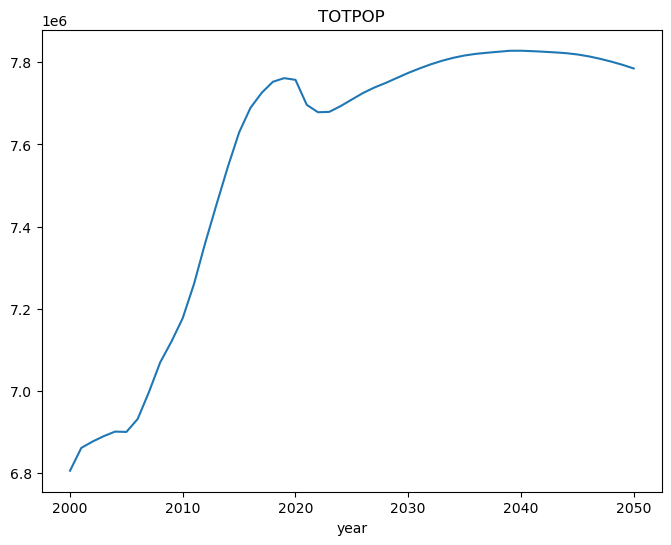

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_57629/253236205.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)


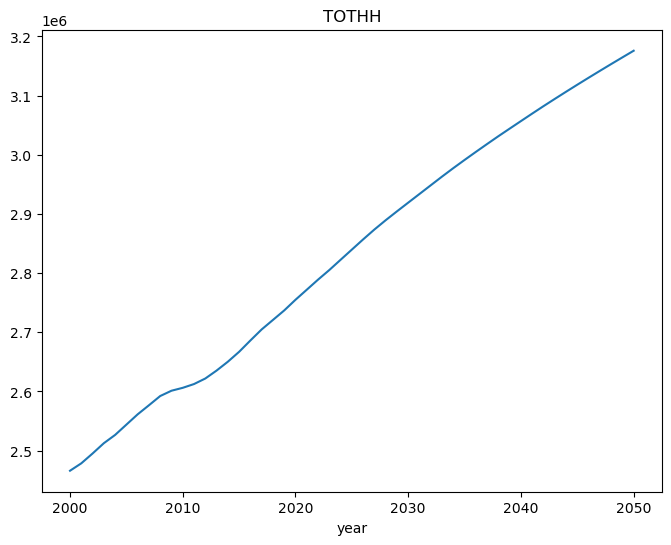

/var/folders/x8/3_n775lx7zq1nv3mddc7vmlh0000gp/T/ipykernel_57629/253236205.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)


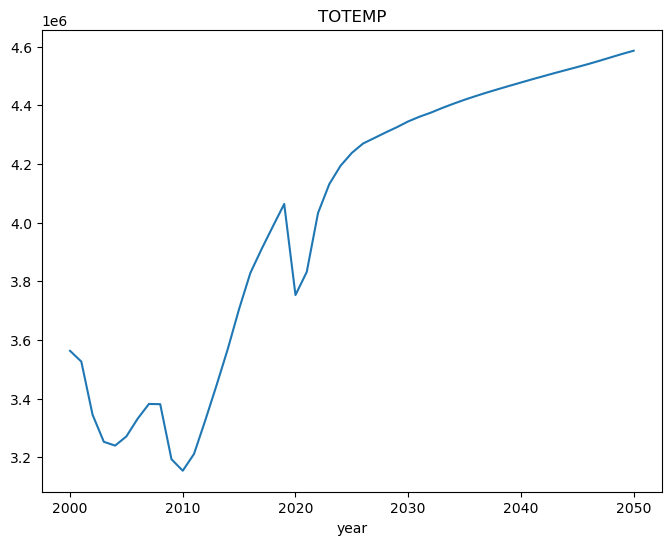

In [181]:
for var in ['TOTPOP','TOTHH','TOTEMP']:
    fig, ax = plt.subplots(figsize=[8,6])
    bay_area_data_long.loc[:,:,var].sum(level=0).plot(ax=ax)
    ax.set_title(f'{var}')
    plt.show()

## Average Household Size

<AxesSubplot: xlabel='year'>

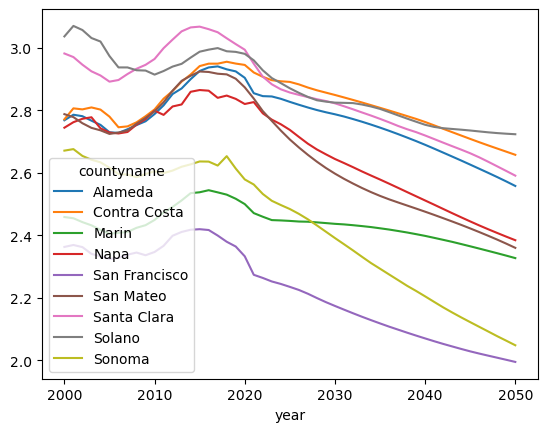

In [73]:
(bay_area_data_long.loc[:,:,'TOTPOP'] / bay_area_data_long.loc[:,:,'TOTHH']).unstack(1).plot()

## Jobs per household

<AxesSubplot: xlabel='year'>

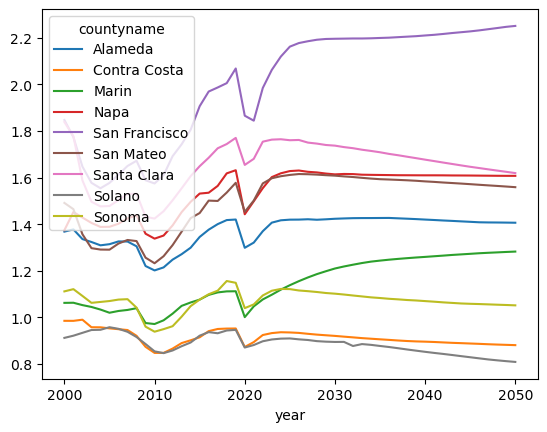

In [74]:
(bay_area_data_long.loc[:,:,'TOTEMP'] / bay_area_data_long.loc[:,:,'TOTHH']).unstack(1).plot()

In [75]:
bay_area_data_long.loc[:,:,'TOTEMP'].unstack(1)/bay_area_data_long.loc[:,:,'TOTEMP'].unstack(1).loc[2020]

countyname,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
year,,,,,,,,,
2000.0,0.952165,0.980451,1.017443,0.881090,0.874210,0.981481,0.973902,0.898120,0.976455
2001.0,0.963763,0.985162,1.020860,0.937015,0.840736,0.965862,0.948291,0.913231,0.993631
2002.0,0.938150,0.999766,1.014826,0.930801,0.784076,0.898050,0.854319,0.938227,0.977071
2003.0,0.933347,0.975651,1.011020,0.924728,0.756560,0.860884,0.811316,0.963450,0.959493
2004.0,0.926739,0.986177,1.003730,0.930801,0.746698,0.857309,0.805457,0.973788,0.969474
2005.0,0.934651,0.995515,0.995556,0.939698,0.759503,0.857983,0.813114,0.998633,0.978600
2006.0,0.946980,1.009919,1.004197,0.958198,0.778738,0.874197,0.832322,1.005588,0.992918
2007.0,0.950065,1.016136,1.013561,0.980935,0.801634,0.888495,0.852344,0.995242,1.001529
2008.0,0.940596,0.996501,1.021412,0.993927,0.817682,0.887122,0.859673,0.975676,0.978544
